# Group selfie

In [2]:
import pandas as pd
import random
import numpy as np

random.seed(42)

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from group_selfies import (
    fragment_mols,
    Group,
    MolecularGraph,
    GroupGrammar,
    group_encoder,
)

from rdkit.Chem.Draw import IPythonConsole

from IPython.display import display
from test_utils import *
from rdkit import RDLogger

RDLogger.DisableLog("rdApp.*")


# Input data

## Extract data from PsychLight file

In [4]:
# import data from PsychLight
PsychLight_data = pd.read_csv(
    "https://raw.githubusercontent.com/HauserGroup/PsyModTraining/refs/heads/main/data/PsychLight/PsychLight_TrainingSet.csv"
)
print(PsychLight_data.head())

   Class  Known         ID                                             SMILES
0      1  known       5-HT                         CN(C)CCc1c[nH]c2ccc(O)cc12
1      1  known        DMT                            CN(C)CCc1c[nH]c2ccccc12
2      1  known  25CN-NBOH                   COc1cc(CCNCc2ccccc2O)c(OC)cc1C#N
3      1  known        LSD  CCN(CC)C(=O)[C@@H]1C=C2c3cccc4[nH]cc(c34)C[C@H...
4      1  known  N-Me-5-HT                            CNCCc1c[nH]c2ccc(O)cc12


In [5]:
PsychLight_SMILES = PsychLight_data["SMILES"]
PsychLight_labels = PsychLight_data["Class"]

## Generate group selfie encoding

### Generate fragments

In [6]:
# data preparation for fragmenting
PsychLight_SMILES_list = PsychLight_SMILES.tolist()
print(PsychLight_SMILES_list)

['CN(C)CCc1c[nH]c2ccc(O)cc12', 'CN(C)CCc1c[nH]c2ccccc12', 'COc1cc(CCNCc2ccccc2O)c(OC)cc1C#N', 'CCN(CC)C(=O)[C@@H]1C=C2c3cccc4[nH]cc(c34)C[C@H]2N(C)C1', 'CNCCc1c[nH]c2ccc(O)cc12', 'NCCc1c[nH]c2ccccc12', 'CN(C)CCc1c[nH]c2ccc(O)cc12', 'CN(C)CCc1c[nH]c2cccc(O)c12', 'COc1ccc2[nH]cc(CCN(C)C)c2c1', 'CNCCc1c[nH]c2ccccc12', 'C[C@@H](N)Cc1ccc2c(c1)OCO2', 'COc1cc(CC(C)N)c(OC)cc1I', 'CC[C@H]1C[C@@H]2C[C@H]3c4[nH]c5ccc(O)cc5c4CCN(C2)[C@@H]13', 'CC[C@H]1C[C@@H]2C[C@H]3c4[nH]c5ccc(OC)cc5c4CCN(C2)[C@@H]13', 'COc1cc(CCN)c(OC)cc1I', 'CN(C)CCc1c[nH]c2cccc(OP(=O)(O)O)c12', 'CN(C)CCc1c[nH]c2ccc(F)cc12', 'CN(C)CCc1c[nH]c2ccc(Cl)cc12', 'COc1ccc2c(ccn2C[C@@H](C)N(C)C)c1', 'CN(C)CCc1c[nH]c2ccc(Cn3cncn3)cc12', 'CCCN[C@H]1CCc2nc(N)sc2C1', 'CC(=O)NCCc1c[nH]c2ccc(O)cc12', 'c1ccc(C2(N3CCCCC3)CCCCC2)cc1', 'COc1ccc2[nH]cc(CCNC(C)=O)c2c1', 'C#CCN[C@@H]1CCc2ccc(OC(=O)N(C)CC)cc21', 'CCCN(CCC)C1CCc2cccc(O)c2C1', 'C[C@H](N)Cc1ccccc1', 'C[C@H](N)Cc1ccc2c(c1)OCO2', 'C[C@@H](N)Cc1ccccc1', 'O=C(O)Cc1c[nH]c2ccccc12', 'CNC1(c2c

In [7]:
from group_selfies import fragment_mols
from rdkit import Chem

# get smiles list from PsychLight data
molecules = [Chem.MolFromSmiles(smiles) for smiles in PsychLight_SMILES_list]

# extracting a set of reasonable groups using fragmentation
fragments = fragment_mols(molecules)

# create a dictionary of fragments for tracking
vocab_fragment = dict(
    [(f"frag{idx}", Group(f"frag{idx}", frag)) for idx, frag in enumerate(fragments)]
) 

100%|██████████| 54/54 [00:00<00:00, 642.39it/s]


In [8]:
# create a GroupGrammar object using the predefined fragment vocabulary
grammar_auto = GroupGrammar(vocab=vocab_fragment)

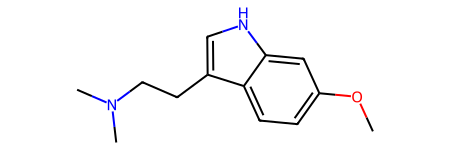

In [9]:
test = Chem.MolFromSmiles(random.choice(PsychLight_SMILES_list))
display(test)


### Group selfie encoding 

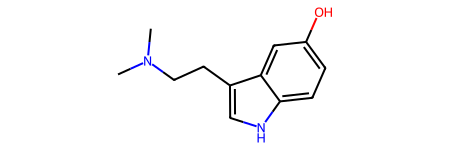

[:0frag0][C][:2frag1][Branch][O][pop][pop]
['[:0frag0][C][:2frag1][Branch][O][pop][pop]', '[:0frag0][C][:2frag1][pop]', '[C][O][C][=C][C][Branch][C][C][N][C][C][=C][C][=C][C][=C][Branch][O][pop][Ring1][=Branch][pop][=C][Branch][O][C][pop][C][=C][Branch][C][#N][pop][Ring2][Ring1][=Branch]', '[C][C][N][Branch][C][C][pop][C][=Branch][=O][pop][CH1][C][=C][C][=C][C][=C][C][N][C][=C][Branch][C][Ring1][N][=Ring1][Branch][pop][C][CH1][Branch][N][Branch][C][pop][C][Ring2][Ring1][Ring2][pop][Ring1][#C]', '[C][N][C][C][:2frag1][Branch][O][pop]', '[N][C][C][:2frag1]', '[:0frag0][C][:2frag1][Branch][O][pop][pop]', '[:0frag0][C][:2frag1][Ring2][O][pop][pop]', '[C][O][:1frag1][Ring1][:0frag0][pop]', '[C][N][C][C][:2frag1]', '[C][CH1][Branch][N][pop][C][C][=C][C][=C][C][=Branch][=C][Ring1][=Branch][pop][O][C][O][Ring1][=Branch]', '[C][O][C][=C][C][Branch][C][C][Branch][C][pop][N][pop][=C][Branch][O][C][pop][C][=C][Branch][I][pop][Ring1][#C]', '[C][C][CH1][C][CH1][C][CH1][C][N][C][=C][C][=C][Branch][O]

In [10]:
encode_input = [Chem.MolFromSmiles(smiles) for smiles in PsychLight_SMILES_list]
display(encode_input[0])
print(grammar_auto.full_encoder(encode_input[0]))
group_selfies = []


for smiles in encode_input:
    encode_mol = grammar_auto.full_encoder(smiles)
    group_selfies.append(encode_mol)
    
print(group_selfies)

### One-hot encode group selfies

In [11]:
# Tokenize the strings into individual tokens
tokens = set(token for smile in group_selfies for token in smile.split("]["))
tokens = {t.strip("[]") for t in tokens}  # Clean up brackets

# Assign indices to each token to build a vocabulary
vocab_token = {token: idx for idx, token in enumerate(sorted(tokens))}
print(vocab_token)

{'#Branch': 0, '#C': 1, '#N': 2, ':0frag0': 3, ':0frag2': 4, ':0frag3': 5, ':1frag1': 6, ':2frag1': 7, ':2frag2': 8, '=Branch': 9, '=C': 10, '=N': 11, '=O': 12, '=Ring1': 13, 'Br': 14, 'Branch': 15, 'C': 16, 'CH1': 17, 'Cl': 18, 'F': 19, 'I': 20, 'N': 21, 'O': 22, 'P': 23, 'Ring1': 24, 'Ring2': 25, 'S': 26, 'pop': 27}


In [12]:
# Convert each string into a list of token indices
encoded_data = []
for smile in group_selfies:
    token_indices = [vocab_token[token.strip("[]")] for token in smile.split("][")]
    encoded_data.append(token_indices)
print(encoded_data)

[[3, 16, 7, 15, 22, 27, 27], [3, 16, 7, 27], [16, 22, 16, 10, 16, 15, 16, 16, 21, 16, 16, 10, 16, 10, 16, 10, 15, 22, 27, 24, 9, 27, 10, 15, 22, 16, 27, 16, 10, 15, 16, 2, 27, 25, 24, 9], [16, 16, 21, 15, 16, 16, 27, 16, 9, 12, 27, 17, 16, 10, 16, 10, 16, 10, 16, 21, 16, 10, 15, 16, 24, 21, 13, 15, 27, 16, 17, 15, 21, 15, 16, 27, 16, 25, 24, 25, 27, 24, 1], [16, 21, 16, 16, 7, 15, 22, 27], [21, 16, 16, 7], [3, 16, 7, 15, 22, 27, 27], [3, 16, 7, 25, 22, 27, 27], [16, 22, 6, 24, 3, 27], [16, 21, 16, 16, 7], [16, 17, 15, 21, 27, 16, 16, 10, 16, 10, 16, 9, 10, 24, 9, 27, 22, 16, 22, 24, 9], [16, 22, 16, 10, 16, 15, 16, 16, 15, 16, 27, 21, 27, 10, 15, 22, 16, 27, 16, 10, 15, 20, 27, 24, 1], [16, 16, 17, 16, 17, 16, 17, 16, 21, 16, 10, 16, 10, 15, 22, 27, 16, 10, 15, 16, 15, 16, 16, 21, 15, 16, 25, 24, 25, 27, 17, 25, 24, 0, 25, 24, 24, 27, 13, 11, 27, 24, 0], [16, 16, 17, 16, 17, 16, 17, 16, 21, 16, 10, 16, 10, 15, 22, 16, 27, 16, 10, 15, 16, 15, 16, 16, 21, 15, 16, 25, 24, 15, 27, 17, 25, 

In [ ]:
# Vocabulary size
vocab_size = len(vocab_token)

# Convert token indices to one-hot encoding
one_hot_data = []
for token_indices in encoded_data:
    one_hot_sequence = np.zeros((len(token_indices), vocab_size))
    for i, index in enumerate(token_indices):
        one_hot_sequence[i, index] = 1
    one_hot_data.append(one_hot_sequence)

print(len(one_hot_data))

54


: 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the one-hot encoded sequences to a fixed length
padded_one_hot_data = pad_sequences(
    [sequence.tolist() for sequence in one_hot_data],
    maxlen=max(len(seq) for seq in one_hot_data),
    dtype="float32",
    padding="post",
)
